In [99]:
# Import the pandas library for data manipulation and analysis
import pandas as pd  
# Import the numpy library for numerical computations  
import numpy as np  
# Import specific functions from the math module for trigonometric and other mathematical operations
from math import radians, cos, sin, asin, sqrt  


In [100]:
gpsdata = pd.read_csv ('GPS_data.csv')
gpsdata.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [101]:
#Define Haversine formula
#Inputs are the coordinates of two points, lon1, lat1, lon2, lat2
#Returns the distance between them
        
def haversine(lon1, lat1, lon2, lat2):
            
     #Calculate the great circle distance in kilometers between two points  on the earth (specified in decimal degrees)\n",
        
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.\n",
    return c * r 

In [102]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

# Latitude and longitude
lat = gpsdata['latitude']
lon = gpsdata['longitude']

# Create new columns for distance and time difference
gpsdata['dist'] = np.zeros(lat.shape[0])
gpsdata['time_diff'] = np.zeros(lat.shape[0])

# Calculate distance and time difference
for i in range(lat.shape[0]-1):
    gpsdata.loc[i, 'dist'] = haversine(lon[i], lat[i], lon[i+1], lat[i+1]) * 1000
    gpsdata.loc[i, 'time_diff'] = gpsdata.loc[i+1, 'seconds_elapsed'] - gpsdata.loc[i, 'seconds_elapsed']

# Set initial distance to 0
gpsdata.loc[0, 'dist'] = 0

# Calculate total distance
gpsdata['total_distance'] = gpsdata['dist'].cumsum()

# Calculate velocity
gpsdata['velocity'] = gpsdata['dist'] / gpsdata['time_diff']

# Calculate acceleration
gpsdata['acceleration'] = np.zeros(gpsdata.shape[0])
for i in range(1, gpsdata.shape[0]):
    gpsdata.loc[i, 'acceleration'] = (gpsdata.loc[i, 'velocity'] - gpsdata.loc[i-1, 'velocity']) / gpsdata.loc[i, 'time_diff']
gpsdata.loc[0, 'acceleration'] = 0

# Display the tail of the DataFrame
gpsdata.tail()


,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_distance,velocity,acceleration
217,217,131.460815,25.514726,65.069698,0.992895,0.568808,212.556663,1.745572,0.487355
218,218,132.029623,25.514721,65.069689,1.044510,0.554993,213.601173,1.882024,0.245863
219,219,132.584616,25.514716,65.069680,0.513124,0.554565,214.114297,0.925273,-1.725227
220,220,133.139181,25.514713,65.069675,1.026627,0.554565,215.140925,1.851229,1.669698
221,221,133.693746,25.514709,65.069666,0.000000,0.000000,215.140925,NaN,NaN


In [103]:
"""""""""""""""
A map of movement (Folium)
    
"""""""""""""""

import folium
location_frame = gpsdata[['latitude', 'longitude']] #create data frame with latitude and longitude
location_list = location_frame.values.tolist() #create list of the frame

ave_lat = np.mean(location_list, axis=0)[0] #calculate the average latitude
ave_lon = np.mean(location_list, axis=0)[1] #calculate the average longitude

# Load map centred on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

#add markers to the map
#for each in location_list:
#    folium.Marker(each).add_to(my_map)

#Drow lines of motion
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

my_map.save("Tomoko_map.html")
my_map

(0.0, 140.0, -5.0, 15.0)

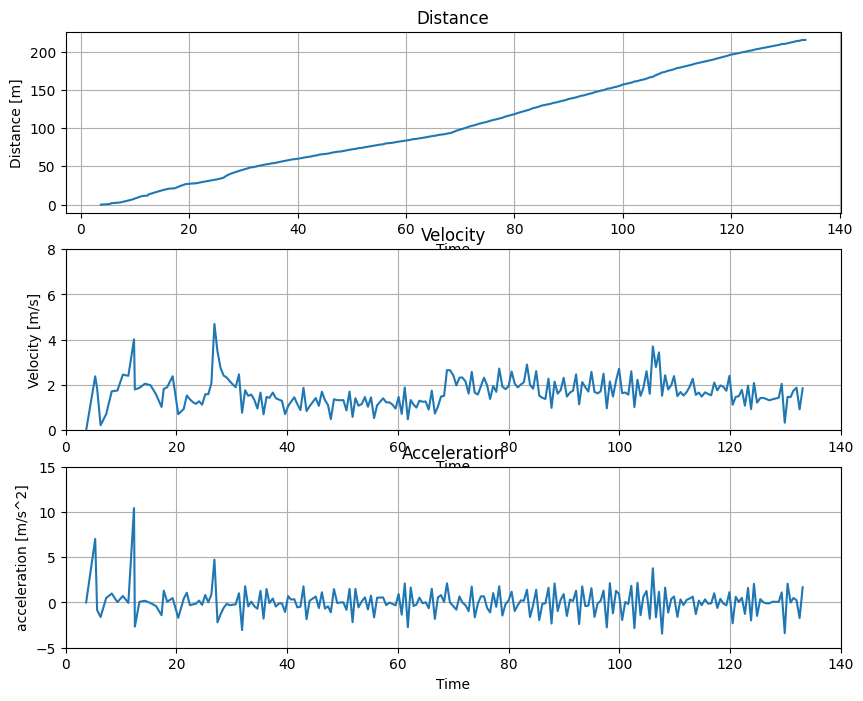

In [104]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))

"""""""""""""""
Distance graph (increasing from zero)
    
"""""""""""""""
plt.subplot(3, 1, 1)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['total_distance'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance [m]')


"""""""""""""""
Velocity graph (calculated from coordinates)
    
"""""""""""""""
plt.subplot(3, 1, 2)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['velocity'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity [m/s]')
plt.axis([0,140,0,8])


"""""""""""""""
Acceleration graph (calculated from speed [one component]) using the GPS data
    
"""""""""""""""
plt.subplot(3, 1, 3)
plt.plot(gpsdata['seconds_elapsed'], gpsdata['acceleration'])
plt.grid()
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('acceleration [m/s^2]')
plt.axis([0,140,-5,15])

In [105]:
"""""""""""""""
Average speed as a number
    
"""""""""""""""
print('The average speed is', gpsdata['velocity'].mean(), 'm/s')


"""""""""""""""
Traveled distance as a number
    
"""""""""""""""
print('Traveled distance as a number is', gpsdata['total_distance'].iloc[-1], 'm')

The average speed is 1.6782391458590495 m/s
Traveled distance as a number is 215.14092455483328 m


In [106]:
#read the data. 
import pandas as pd 
df = pd.read_csv('Acceleration_data.csv')
df.head() #check the first 5 rows
df.info() #check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8446 non-null   int64  
 1   seconds_elapsed  8446 non-null   float64
 2   z                8446 non-null   float64
 3   y                8446 non-null   float64
 4   x                8446 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 330.1 KB


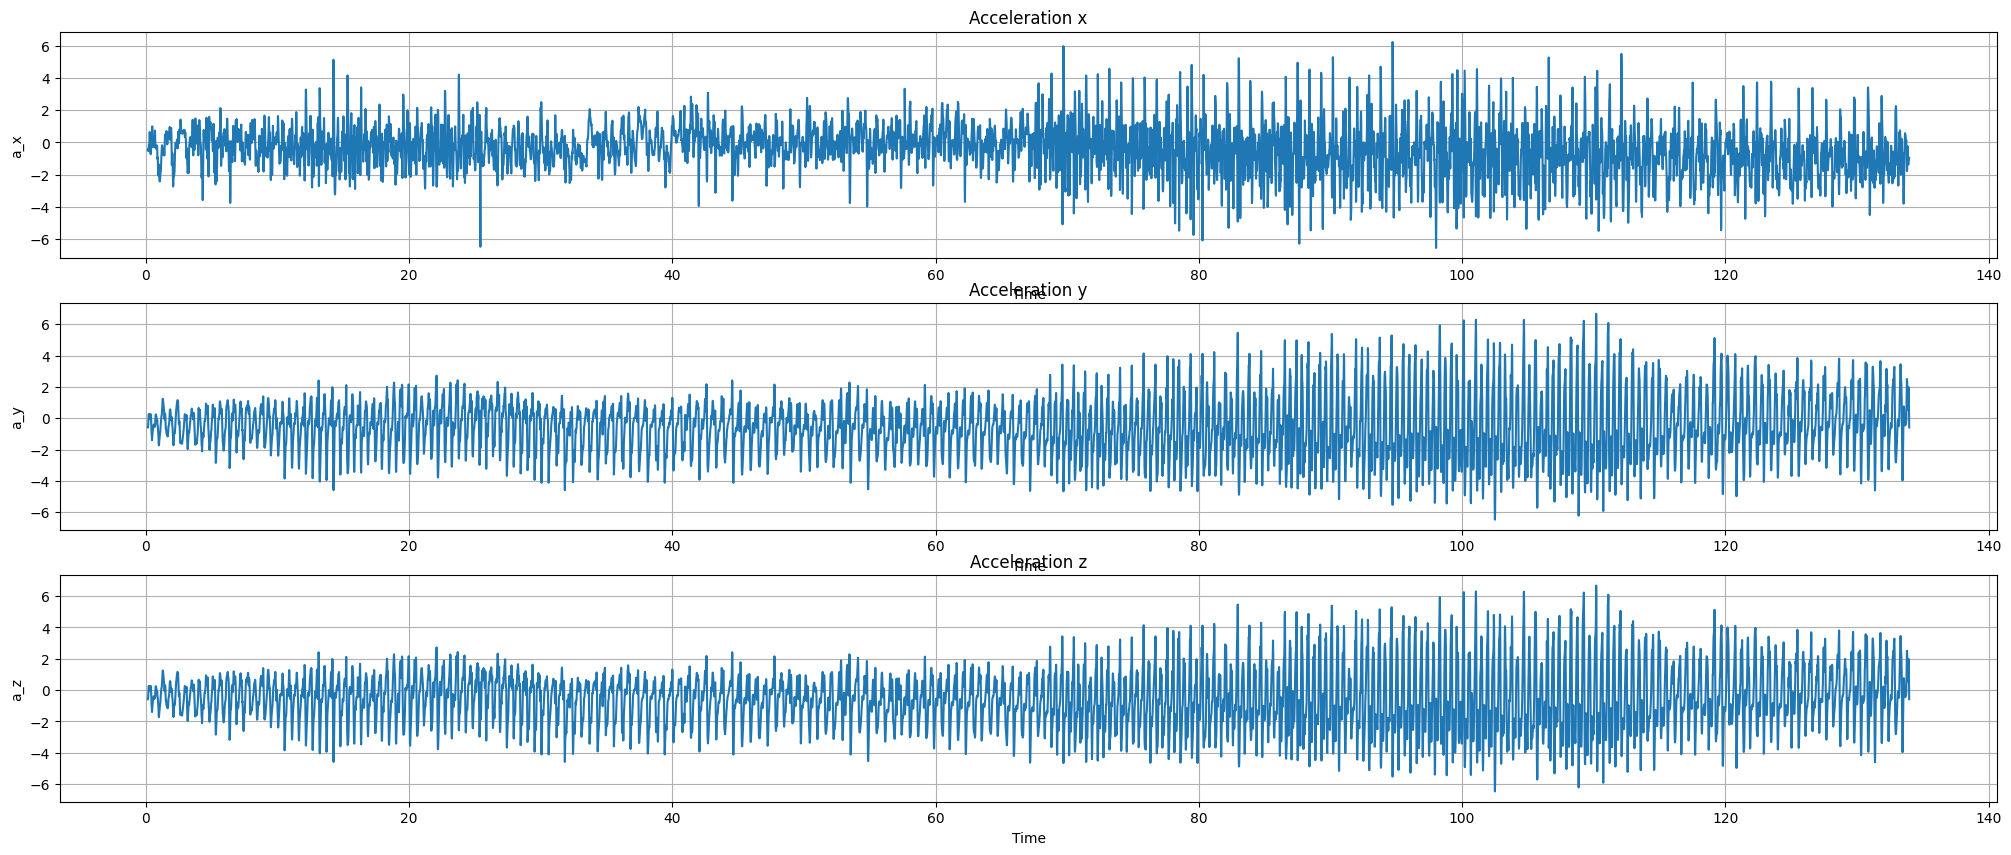

In [107]:
"""""""""""""""
Acceleration graph (observed [three components])using the accelerometer data
    
"""""""""""""""
#make a simple graph
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(3,1,1) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['x']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration x') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_x') #set the y axis label

plt.subplot(3,1,2) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration y') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_y') #set the y axis label

plt.subplot(3,1,3) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration z') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_z') #set the y axis label

plt.show() #show the plot

In [108]:
#applying Butterworth low-pass and high-pass filters
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

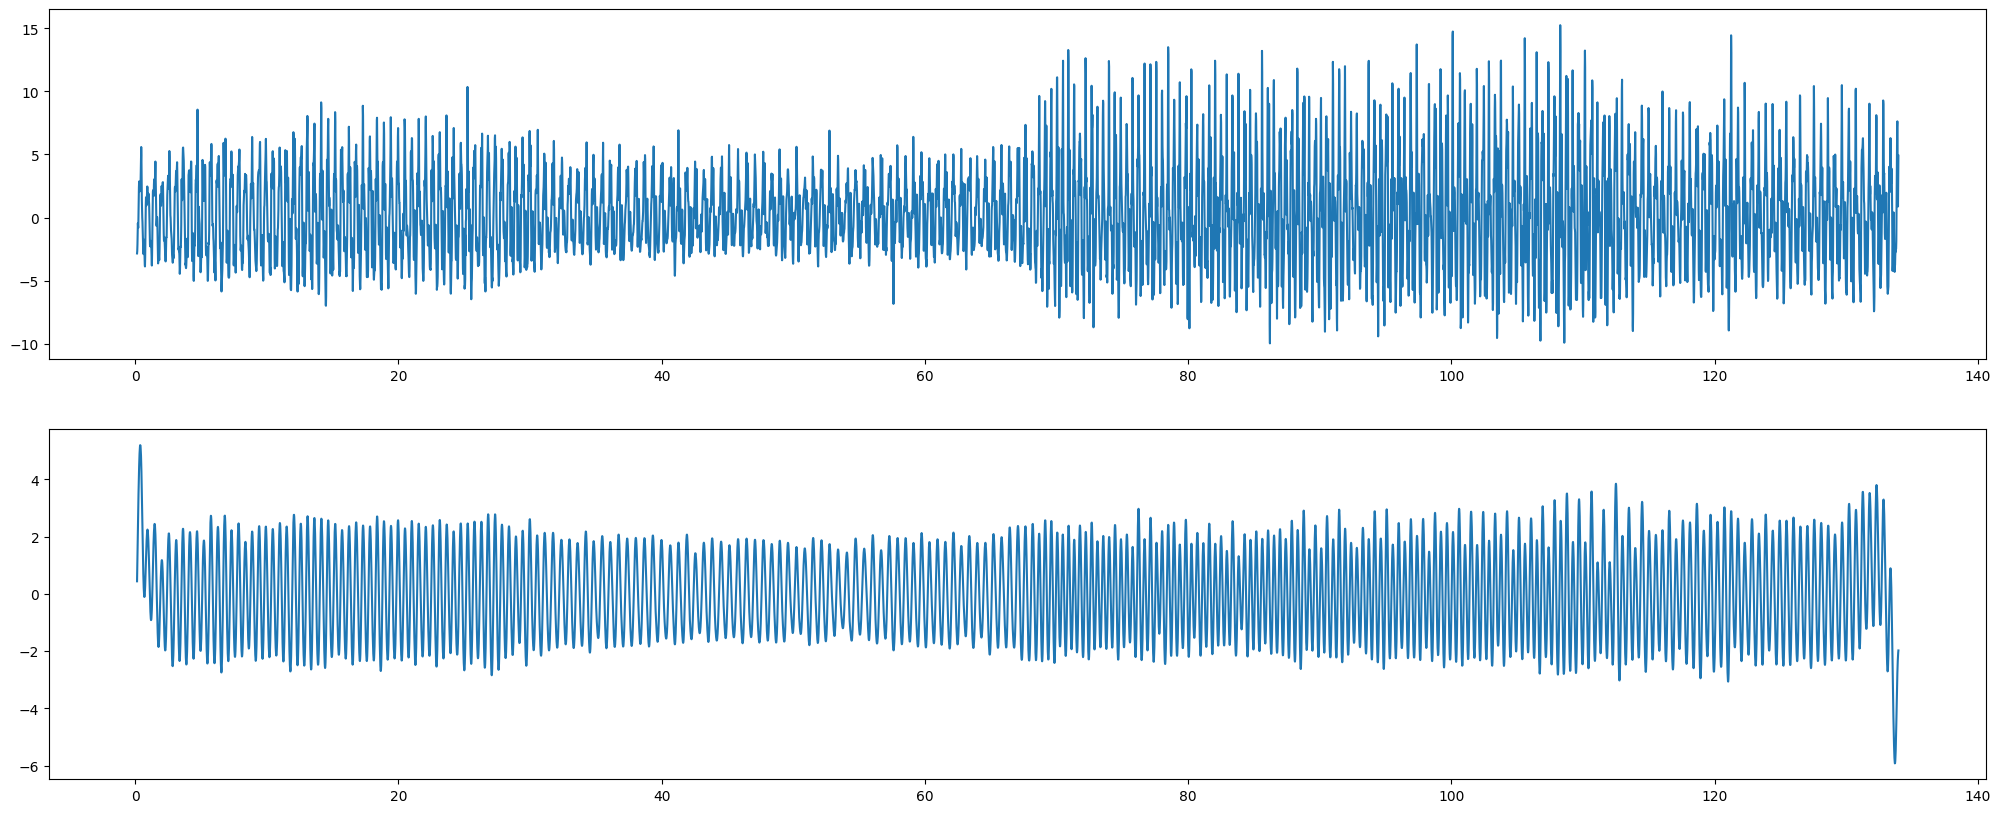

In [109]:
#filter the data
# select the components of the signal
noisy_signal = df['z'] #select the data
time = df['seconds_elapsed'] #select the time

order = 2
dt= (time[len(time) - 1] - time[0])/len(time) # time sampling interval
fs = 1/dt # sample rate, Hz
nyq = 0.5 * fs # Nyquist Frequency

cutoff_H = 1/5 # high pass cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # low pass cutoff frequency of the filter, Hz
#after this filtering we'll have only frequencies between 1/5 and 1/40 Hz

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order) #filter out low frequencies

plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(2,1,1) #3 rows, 1 column, 1st plot
plt.plot(time,noisy_signal)
plt.subplot(2,1,2) #3 rows, 1 column, 1st plot
plt.plot(time,final_signal)

In [110]:
"""""""""""""""
The number of steps 
    
"""""""""""""""
stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print('The number of steps is', step, 'steps')

The number of steps is 255.5 steps


## Does the acceleration calculated from the speed match the observed acceleration? 
### What differences do you notice? What could be their cause?

They are very different from each other!
The observed acceleration data collected from sensors may contain noise, which can result in inaccuracies when calculating acceleration from speed.

#### Here is Ilpo's advice 
Note that calculating the velocity or distance from phone acceleration sensor data is not possible (although it sounds possible in terms of fundamental physics)! The reason is that the coordinate system is not fixed and the acceleration data is very noisy. 


## Is the number of steps logical?

I got 255 steps. Typically, it is considered that adult males take approximately 0.75 to 1.00 steps per meter. Therefore, for a total distance of 215 meters, the estimated number of steps would fall between 215 and 285 steps. Thus, the total number of steps generated appears to be logical.